## Problem Statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

In this project, you will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

* The model will only be able to achieve one of the two goals 
    - To predict customers who will churn.
    
* You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components 
  which are not easy to interpret.
  
* Therefore, build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn. 

A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

After identifying important predictors, display them visually - you can use plots, summary tables etc. - whatever you think best conveys the importance of features.

#### Finally, recommend strategies to manage customer churn based on your observations.

## Step 1 : Data Loading & Data Understanding

In [1]:
## Importing all necessary libaries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
## Importing sklearn required libraries

import xgboost as xgb
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

In [3]:
## Importing required libraries for visualization

from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [4]:
## Setting max columns to display

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)

In [5]:
## Loading and viewing the DataSet 

telecom_data = pd.read_csv('telecom_churn_data.csv')
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
## Shape of the dataset

telecom_data.shape

(99999, 226)

In [7]:
## Checking null percentage in data

((telecom_data.isnull().sum()/telecom_data.index.size)*100).sort_values(ascending=False)

arpu_3g_6            74.846748
night_pck_user_6     74.846748
total_rech_data_6    74.846748
arpu_2g_6            74.846748
max_rech_data_6      74.846748
                       ...    
max_rech_amt_7        0.000000
max_rech_amt_6        0.000000
total_rech_amt_9      0.000000
total_rech_amt_8      0.000000
sep_vbc_3g            0.000000
Length: 226, dtype: float64

In [8]:
## List of columns with null values more than 40%

dropping_columns_50 = list(telecom_data.columns[((telecom_data.isnull().sum()/telecom_data.index.size)*100) >= 40])
len(dropping_columns_50)

40

## Step 2 : Data Cleaning & Preparation

In [9]:
## Let us check if we have any duplicate data, i.e, if we have more than one record for any number

telecom_data.mobile_number.value_counts().sum()

99999

Since the unique value count is same as the number of rows which we got above from shape, this means that there is no duplicate 
data. Let us prepare the data as per the requirement

In [10]:
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [11]:
## Before any modifications, let us keep the original dataset seperated and create a copy of the Original Dataset

telecom_df = telecom_data.copy()
telecom_df.shape

(99999, 226)

In [12]:
## Dropping features having Null data more than 40%

telecom_df.drop(dropping_columns_50, axis=1, inplace=True)
print(telecom_df.shape)

(99999, 186)


In [13]:
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0

In [14]:
## The circle_id column is not relevant to us as the Telecom Circular area will not make any relevance while modelling as well
## Therefore, let us drop this feature

telecom_df = telecom_df.drop(['circle_id'], axis=1)
telecom_df.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.0,40.31,178.5

In [15]:
## Checking data statistics

telecom_df.describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000

### Filter High - Value customers

Those who have recharged with an amount more than or equal to X, where X is greater than 70th percentile of the average recharge amount in the first two months (the good phase)

In [16]:
## Calculating Average Good Phase, i.e. 6th and 7th month recharge amount to find 0.7 percentile of the data

telecom_df['avg_rech_good_phase'] = ((telecom_df['total_rech_amt_6'] + telecom_df['total_rech_amt_7'])/2)

In [17]:
X = telecom_df.avg_rech_good_phase.quantile(0.7)
X

368.5

Filtering the records where recharge is equal to or more than above value of X, which is 368.5

In [18]:
telecom_df = telecom_df[telecom_df.avg_rech_good_phase >= X] 
telecom_df.shape

(30011, 186)

After filtering we have got 30k records now filtered out of 99.9k records

### Tag churners and remove attributes of the churn phase

Tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
   * total_ic_mou_9
   * total_og_mou_9
   * vol_2g_mb_9
   * vol_3g_mb_9

In [19]:
cols_month_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [20]:
telecom_df['Churn'] = telecom_df.apply(lambda row : 1 if (row.total_ic_mou_9 == 0 and row.total_og_mou_9 == 0 and row.vol_2g_mb_9 ==0 and row.vol_3g_mb_9 == 0) else 0, axis = 1)

In [21]:
## Let us check percentage of Customers who have churned

telecom_df.Churn.value_counts() * 100 / telecom_df.shape[0]

0    91.359835
1     8.640165
Name: Churn, dtype: float64

#### We have around 8% of the customers who have churned 

After tagging churners, we need to remove all the attributes corresponding to the churn phase all attributes having ‘ _9’, etc. 
in their names

In [22]:
churn_months_col = telecom_df.columns[telecom_df.columns.str.contains('_9')]
churn_months_col

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9',
       'monthly_3g_9', 'sachet_3g_9'],
      dtype='object')

In [23]:
new_telecom_data = telecom_df.drop(churn_months_col, axis=1)
new_telecom_data.shape

(30011, 143)

In [24]:
## Viewing the data again

new_telecom_data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avg_rech_good_phase,Churn
7,7000701601,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0,1
8,7001524846,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,6/25/2014,7/31/2014,8/30/2014,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.0,0.0,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0

As we can observe, few features are having only 1 unique values and thus, are also not valued for our analysis as well as it has no variation in the data. Therefore, we can go ahead and drop the data

In [25]:
## Let us get all the features which have only 1 unique value 

cols = []

for col in new_telecom_data.columns :
    unique_cnt = new_telecom_data[col].nunique()
    if unique_cnt == 1 :
        cols.append(col)

print(cols)

['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [26]:
## Dropping the above features

processed_data = new_telecom_data.drop(cols, axis = 1)
processed_data.shape

(30011, 131)

In [27]:
## Checking null percentage in data again

((processed_data.isnull().sum()/processed_data.index.size)*100).sort_values(ascending=False)

std_ic_t2t_mou_8      3.125521
roam_og_mou_8         3.125521
loc_og_t2c_mou_8      3.125521
std_ic_mou_8          3.125521
isd_og_mou_8          3.125521
                        ...   
max_rech_amt_7        0.000000
max_rech_amt_8        0.000000
last_day_rch_amt_6    0.000000
last_day_rch_amt_7    0.000000
Churn                 0.000000
Length: 131, dtype: float64

In [28]:
## We will change the datatype of date features as date-time in place of object

processed_date_col = processed_data.columns[processed_data.columns.str.contains('date')]
processed_date_col

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'], dtype='object')

In [29]:
## Changing the data types for these features from object to date

for col in processed_date_col :
    processed_data[col] = pd.to_datetime(processed_data[col])
    
processed_data[processed_date_col].head(10)

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
7,2014-06-27,2014-07-25,2014-08-26
8,2014-06-25,2014-07-31,2014-08-30
13,2014-06-20,2014-07-22,2014-08-30
16,2014-06-30,2014-07-31,2014-08-14
17,2014-06-30,2014-07-30,2014-08-25
21,2014-06-30,2014-07-31,2014-08-31
24,2014-06-23,2014-07-17,2014-08-31
33,2014-06-30,2014-07-30,2014-08-26
38,2014-06-30,2014-07-28,2014-08-24
41,2014-06-24,2014-07-22,2014-08-31


As of now, these data preparation steps looks fine. We decided not to drop the data as of now because we might loose some data which can be useful while model building.

We will now move to Exploratory Data analysis to find some more insights in the data

## Step 3 : Exploratory Data Analysis

In [30]:
numerical_columns = list(processed_data.select_dtypes(['int', 'float']).columns)
numerical_columns

['mobile_number',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_

We have a huge number of numerical features, therefore we will start with selective columns and will go ahead with EDA.

Let us start with the recharge features

In [31]:
recharge_amnt_columns =  processed_data.columns[processed_data.columns.str.contains('rech_amt|rech_num|max_rech_data', regex=True)]
recharge_amnt_columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'],
      dtype='object')

In [32]:
processed_data.loc[:, recharge_amnt_columns].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,12.121322,11.913465,10.225317,697.365833,695.962880,613.638799,171.414048,175.661058,162.869348
std,9.543550,9.605532,9.478572,539.325984,562.143146,601.821630,174.703215,181.545389,172.605809
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,4.000000,432.000000,426.500000,309.000000,110.000000,110.000000,67.000000
50%,9.000000,9.000000,8.000000,584.000000,581.000000,520.000000,120.000000,128.000000,130.000000
75%,15.000000,15.000000,13.000000,837.000000,835.000000,790.000000,200.000000,200.000000,198.000000
max,307.000000,138.000000,196.000000,35190.000000,40335.000000,45320.000000,4010.000000,4010.000000,4449.000000


From above data details, we can see the minimum value for these features is 1.

As observed above, we have high NA values, to proceed further we will impute the NA values with 0. Since no recharge is done, we can make it as 0

In [33]:
## Checking the NA% again for our recharge features

((processed_data.loc[:, recharge_amnt_columns].isna().sum() / processed_data.index.size) * 100 )

total_rech_num_6    0.0
total_rech_num_7    0.0
total_rech_num_8    0.0
total_rech_amt_6    0.0
total_rech_amt_7    0.0
total_rech_amt_8    0.0
max_rech_amt_6      0.0
max_rech_amt_7      0.0
max_rech_amt_8      0.0
dtype: float64

In [34]:
## Defining a user defined function to create the boxplots for our numeric features. Since we have various numeric features, 
## so we will call on them indivizually and not loop

def plot_boxplot(dataframe, feature) :
    plt.figure(figsize=(21,16))  
    
    plt.subplot(2, 3, 1) 
    sns.boxplot(x = 'Churn', y = feature+'_6', data = dataframe, hue="Churn", showfliers=False,palette=("crest"))
    
    plt.subplot(2,3,2)
    sns.boxplot(x = 'Churn', y = feature+'_7', data = dataframe, hue="Churn", showfliers=False,palette=("crest"))

    plt.subplot(2,3,3)
    sns.boxplot(x = 'Churn', y = feature+'_8', data = dataframe, hue="Churn", showfliers=False,palette=("crest"))
    plt.show()

In [35]:
# Let us view the numeric features again which we will be plotting

recharge_amnt_columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'],
      dtype='object')

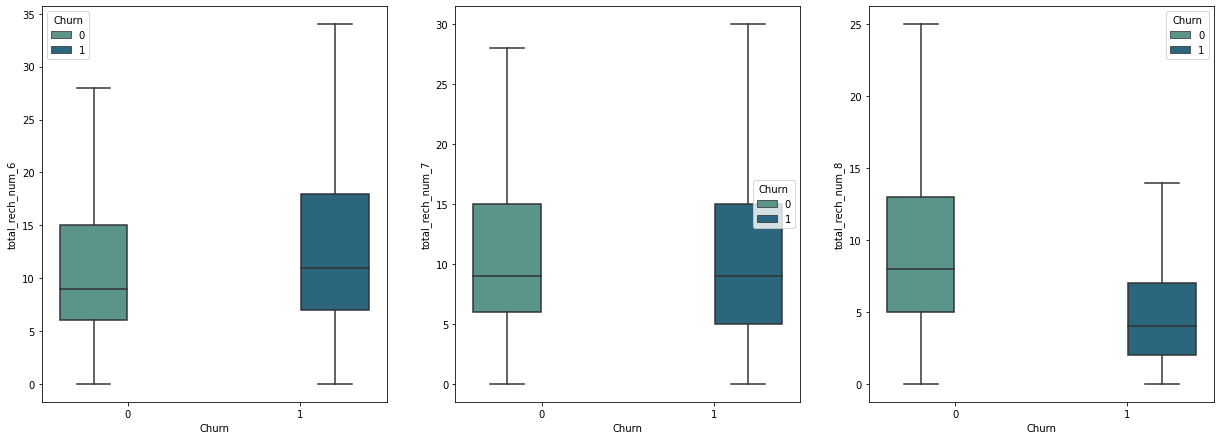

In [36]:
plot_boxplot(processed_data, 'total_rech_num')

#### There is a decrease in total number of recharges done for the 8th month which is the 'Action Phase' in comparison to 6th & 7th which are the 'Good Phase' months

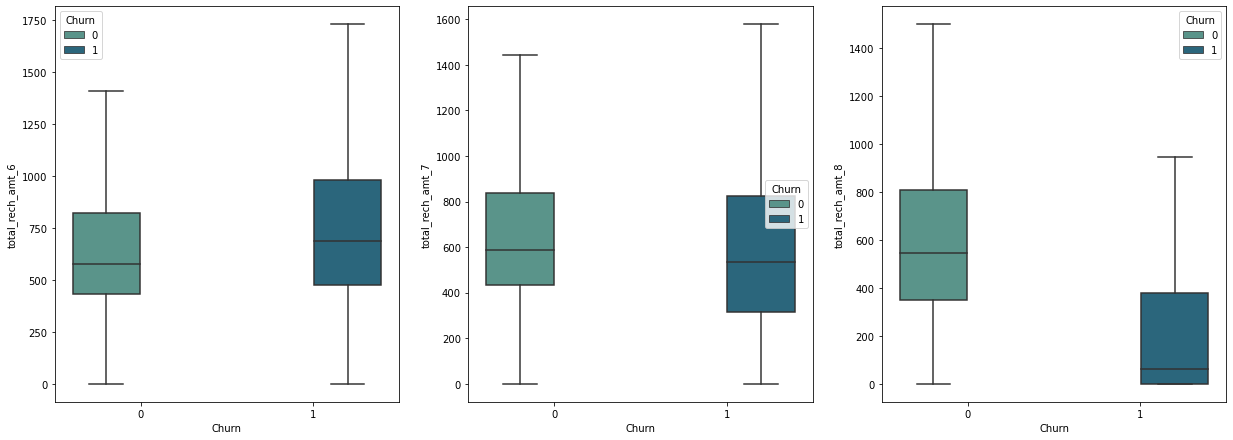

In [37]:
plot_boxplot(processed_data, 'total_rech_amt')

#### From the above plot, we can clearly observe a huge drop in the Action month in the Total recharge amounts

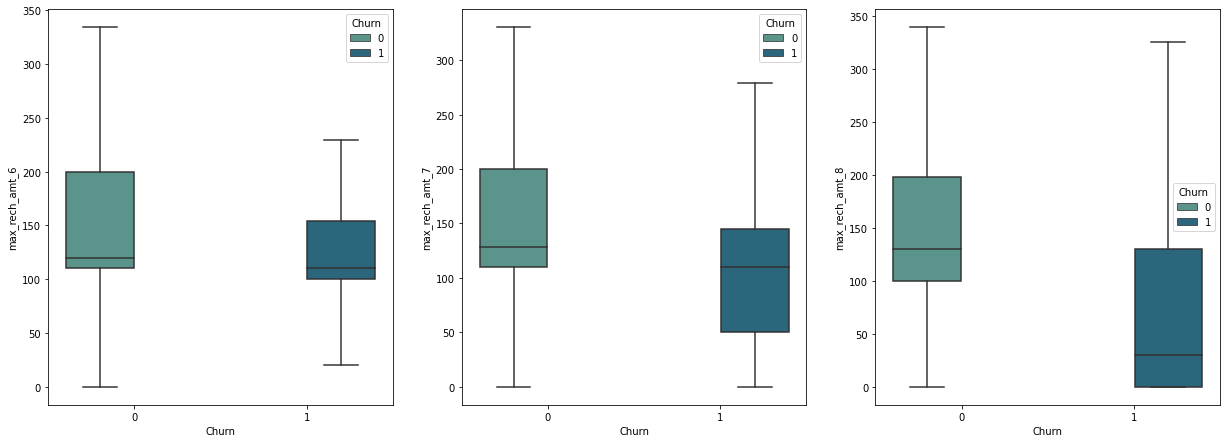

In [38]:
plot_boxplot(processed_data, 'max_rech_amt')

#### As the above plots, here again the Maximum recharge amount has been dropped drastically in the Action phase

Apart from the recharge data, let us also view the last day recharge amount

In [39]:
recharge_day_features =  processed_data.columns[processed_data.columns.str.contains('day', regex=True)]
recharge_day_features

Index(['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'], dtype='object')

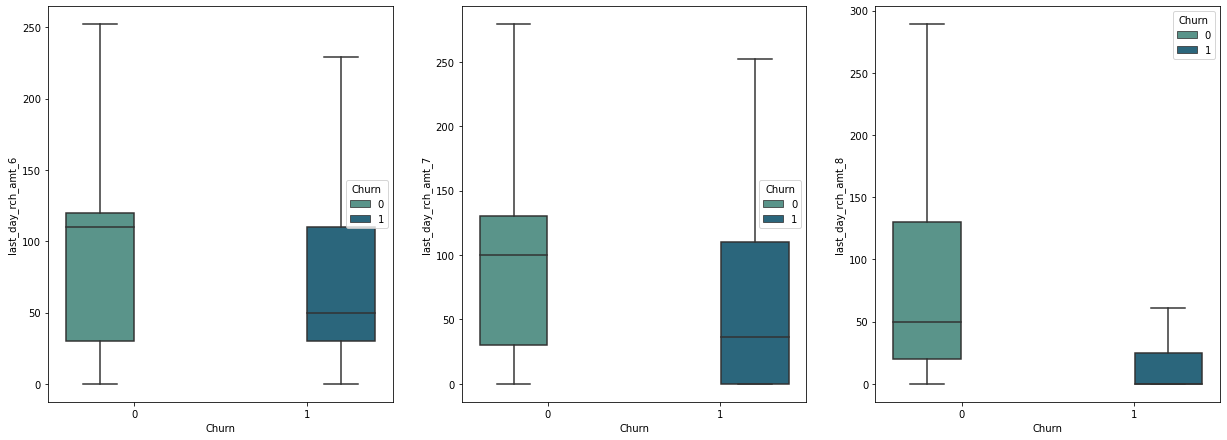

In [40]:
plot_boxplot(processed_data, 'last_day_rch_amt')

#### The recharge amount has been dropped hugely in the Action phase for the Churn customers

Next, let us the usage for services provided and do usage based exploratory analysis

In [41]:
services_data_features = processed_data.columns[processed_data.columns.str.contains('2g|3g', regex=True)]
services_data_features

Index(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object')

In [42]:
## Checking the NA% again for our service features

((processed_data.loc[:, services_data_features].isna().sum() / processed_data.index.size) * 100 )

vol_2g_mb_6     0.0
vol_2g_mb_7     0.0
vol_2g_mb_8     0.0
vol_3g_mb_6     0.0
vol_3g_mb_7     0.0
vol_3g_mb_8     0.0
monthly_2g_6    0.0
monthly_2g_7    0.0
monthly_2g_8    0.0
sachet_2g_6     0.0
sachet_2g_7     0.0
sachet_2g_8     0.0
monthly_3g_6    0.0
monthly_3g_7    0.0
monthly_3g_8    0.0
sachet_3g_6     0.0
sachet_3g_7     0.0
sachet_3g_8     0.0
aug_vbc_3g      0.0
jul_vbc_3g      0.0
jun_vbc_3g      0.0
sep_vbc_3g      0.0
dtype: float64

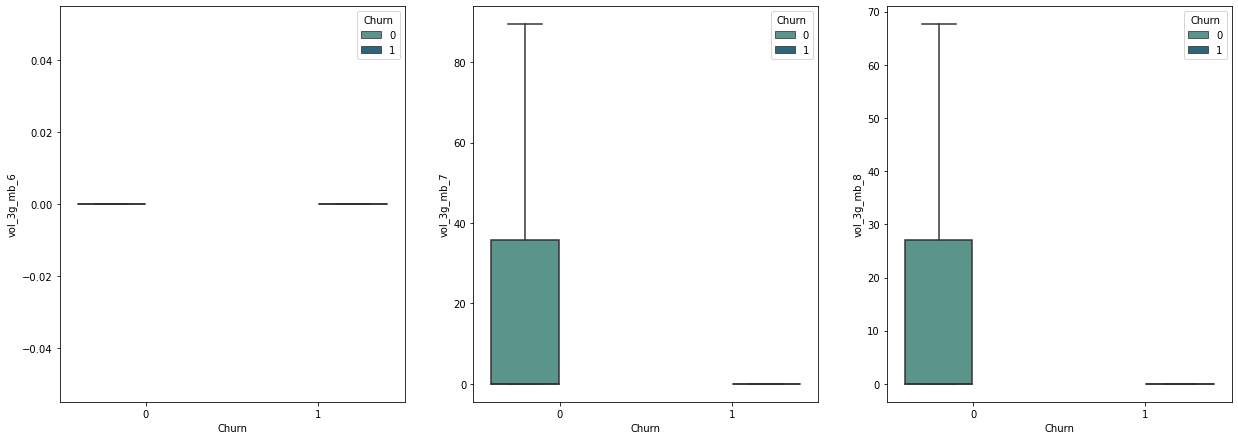

In [43]:
## Plotting Boxplots for the service features

plot_boxplot(processed_data, 'vol_3g_mb')

AS the above graph is not interpretable, let us plot bar graph for these features

In [44]:
def plot_bar_chart(df,columns_list):
    df_0 = df[df.Churn==0].filter(columns_list)
    df_1 = df[df.Churn==1].filter(columns_list)

    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

    frames = [mean_df_0, mean_df_1]
    mean_bar = pd.concat(frames)

    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
    plt.show()

In [45]:
# let's check monthly 2G/3G service schemes
monthly_usage_2g_3g = processed_data.columns[processed_data.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_usage_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

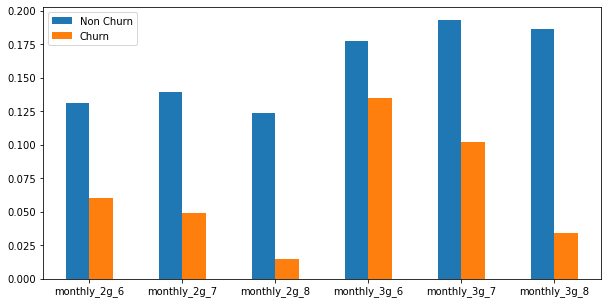

In [46]:
plot_bar_chart(processed_data, monthly_usage_2g_3g)

From the above graph, we can clearly observe that the usage has dropped clearly from the good phase to action phase. 
For non churn customers, the 2g and 3g service is highly used as compared to the Churn customers

In [47]:
## Checking the VBC features, i.e, Volume based cost

vbc_features = processed_data.columns[processed_data.columns.str.contains('vbc_',regex=True)]
vbc_features.tolist()

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [48]:
## Since the Sep month, i.e, the Churn phase data is not required, we can drop the sep_vbc_3g feature

processed_data.drop('sep_vbc_3g', axis=1, inplace=True)

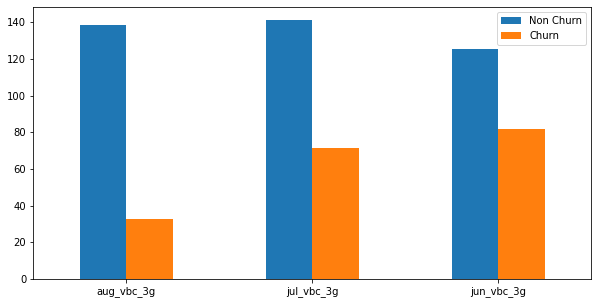

In [49]:
plot_bar_chart(processed_data, vbc_features)

The above graph depicts that there is a drop in the Volume base cost in the Action phase, the cost for Non-Churned customers is significantly higher than the churned customers

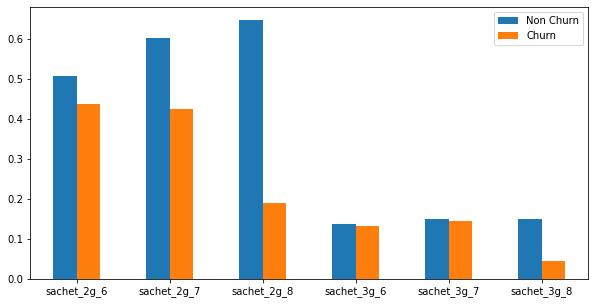

In [50]:
## Let us now check for sachet features

sachet_2g_3g_col = processed_data.columns[processed_data.columns.str.contains('sachet_2g|sachet_3g',regex=True)]
plot_bar_chart(processed_data, sachet_2g_3g_col)

There is a drop in the 8th month for the Churned customers

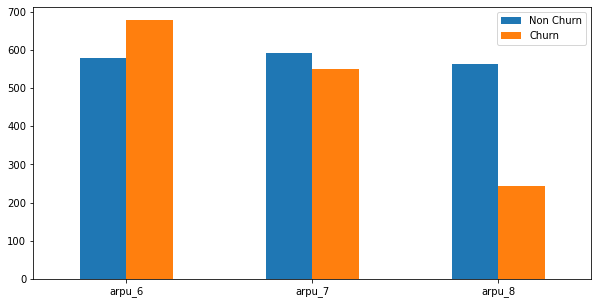

In [51]:
## Let us also check revenue features

revenue_features = processed_data.columns[processed_data.columns.str.contains('arpu_')]
plot_bar_chart(processed_data, revenue_features)

* The above graph depicts a clear and drastic drop in the Churned customers with respect to the average revenue
* The customers with decrease in 'ARPU' are more likely to churn

#### Let us also check the Minutes of usage calls data

In [52]:
mou_features = processed_data.columns[processed_data.columns.str.contains('mou')]
mou_features

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [53]:
## Checking the null values again

((processed_data[mou_features].isna().sum() / processed_data[mou_features].index.size)*100).sort_values(ascending=False)

isd_ic_mou_8        3.125521
loc_ic_t2t_mou_8    3.125521
loc_ic_t2m_mou_8    3.125521
std_og_t2t_mou_8    3.125521
loc_og_t2c_mou_8    3.125521
loc_ic_t2f_mou_8    3.125521
loc_og_t2f_mou_8    3.125521
loc_ic_mou_8        3.125521
std_og_mou_8        3.125521
loc_og_t2m_mou_8    3.125521
std_ic_t2t_mou_8    3.125521
spl_og_mou_8        3.125521
loc_og_t2t_mou_8    3.125521
std_ic_t2m_mou_8    3.125521
std_og_t2m_mou_8    3.125521
roam_og_mou_8       3.125521
std_ic_t2f_mou_8    3.125521
roam_ic_mou_8       3.125521
std_ic_mou_8        3.125521
isd_og_mou_8        3.125521
offnet_mou_8        3.125521
spl_ic_mou_8        3.125521
std_og_t2f_mou_8    3.125521
onnet_mou_8         3.125521
loc_og_mou_8        3.125521
spl_og_mou_6        1.052947
loc_ic_t2t_mou_6    1.052947
std_ic_t2t_mou_6    1.052947
loc_ic_t2m_mou_6    1.052947
loc_ic_t2f_mou_6    1.052947
loc_ic_mou_6        1.052947
std_ic_t2m_mou_6    1.052947
std_ic_t2f_mou_6    1.052947
std_ic_mou_6        1.052947
spl_ic_mou_6  

In [54]:
## Since we have only 3% data which is NA, we will impute the NA values with 0

processed_data.loc[:, mou_features] = processed_data.loc[:, mou_features].replace(np.nan, 0)

In [55]:
## Checking for the outgoing MOU calls 

mou_og_cols6 = processed_data.columns[processed_data.columns.str.contains('.*_og_.*mou_6',regex=True)]

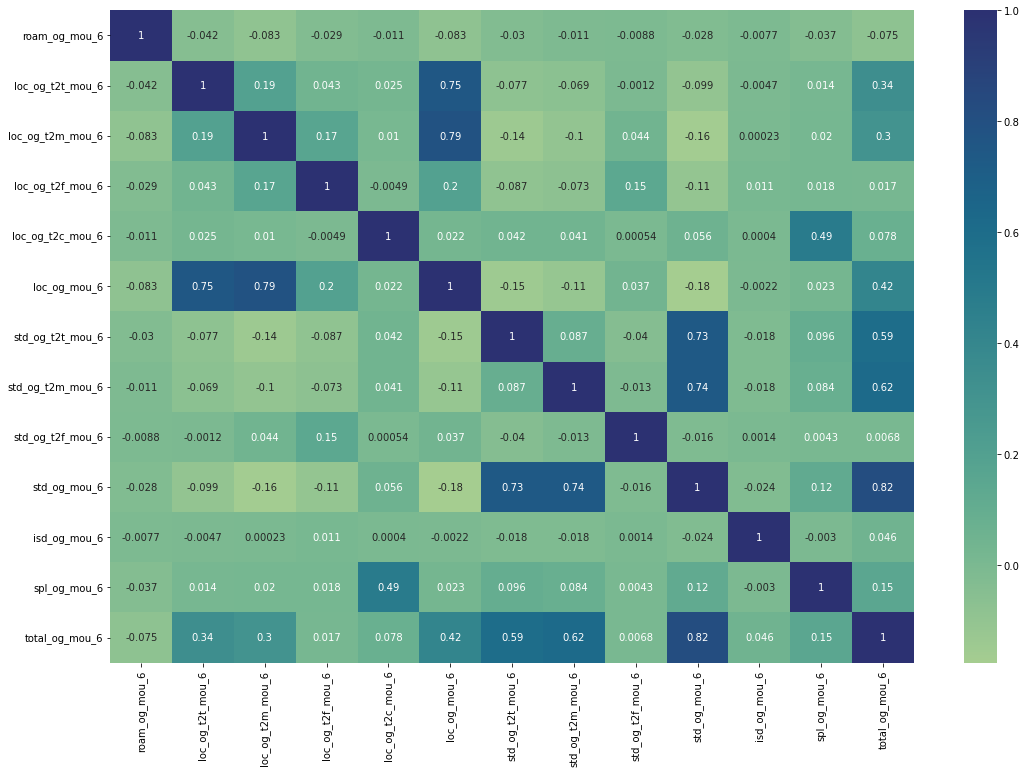

In [56]:
## Since we have too many features, we will plot the heatmap

plt.figure(figsize=(18, 12))
sns.heatmap(processed_data[mou_og_cols6].corr(), cmap="crest" ,annot=True)
plt.show()

We can observe that few features like 'total_og_mou', 'std_og_mou' and 'loc_og_mou' are having higher collinearity, therefore we can drop them. The collinear features will be formed having inference from other features present in the dataset.

In [57]:
drop_features = processed_data.columns[processed_data.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
processed_data.drop(drop_features,axis=1,inplace=True)

In [58]:
processed_data.shape

(30011, 121)

In [59]:
## Similar to the outgoing calls usage, let us also view the incoming calls usage

mou_ic_cols6 = processed_data.columns[processed_data.columns.str.contains('.*_ic_.*mou_6',regex=True)]

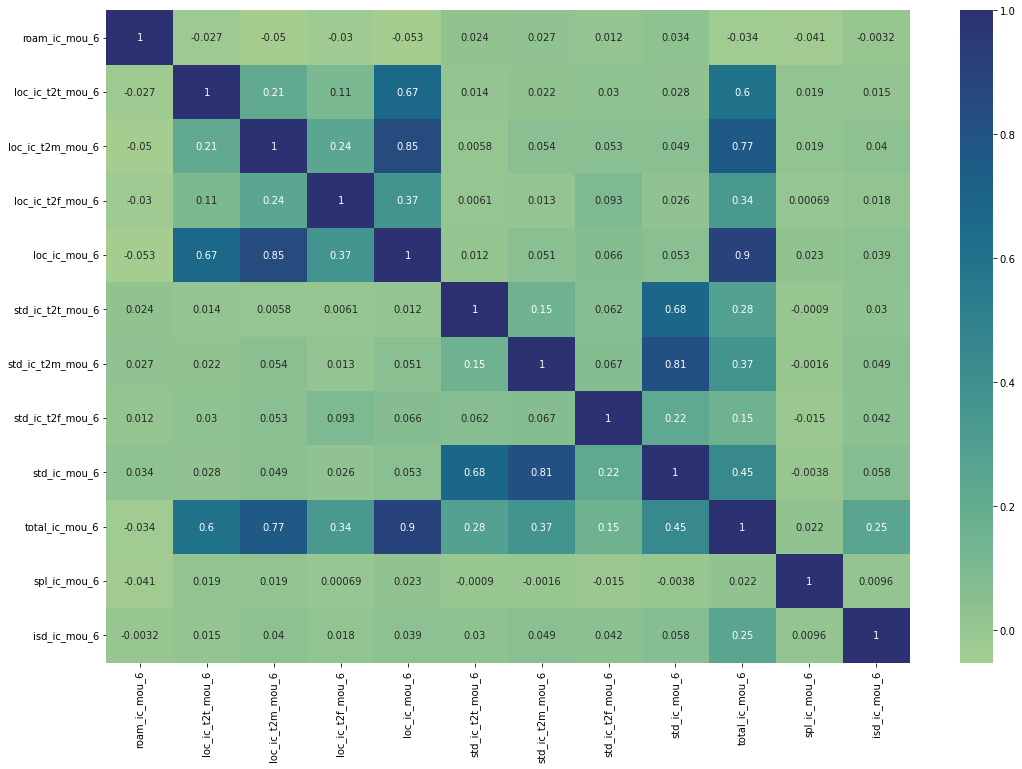

In [60]:
## Since we have too many features, we will plot the heatmap

plt.figure(figsize=(18, 12))
sns.heatmap(processed_data[mou_ic_cols6].corr(), cmap="crest" ,annot=True)
plt.show()

Similar to the outgoing usage, We can observe that few features like 'total_ic_mou', 'std_ic_mou' and 'loc_ic_mou' are having higher collinearity, therefore we can drop them

In [61]:
drop_features = processed_data.columns[processed_data.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
processed_data.drop(drop_features,axis=1,inplace=True)

In [62]:
processed_data.shape

(30011, 112)

#### Checking the Onnet services which are all the kind of calls within the same operator network

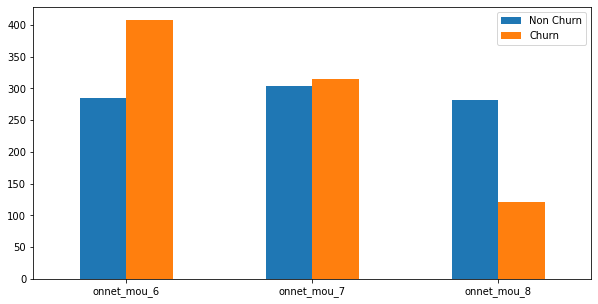

In [63]:
#minutes of usage related columns
onnet_usage_service =  processed_data.columns[processed_data.columns.str.contains('^onnet.*mou',regex=True)]
plot_bar_chart(processed_data, onnet_usage_service)

#### Offnet usage

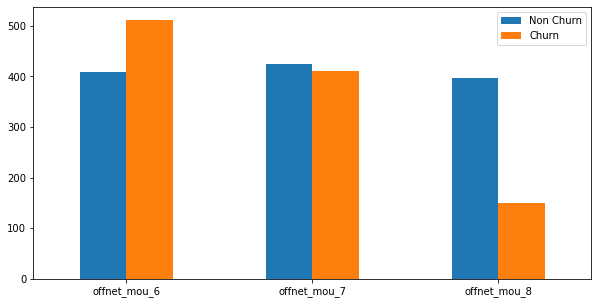

In [64]:
offnet_usage = processed_data.columns[processed_data.columns.str.contains('offnet.*mou',regex=True)]
plot_bar_chart(processed_data, offnet_usage)

Here again, we can see relevant drop for the Churn customers in comparison to the Churn customers for both the Offnet and Onnet services

In [65]:
tenure_data = processed_data.copy()

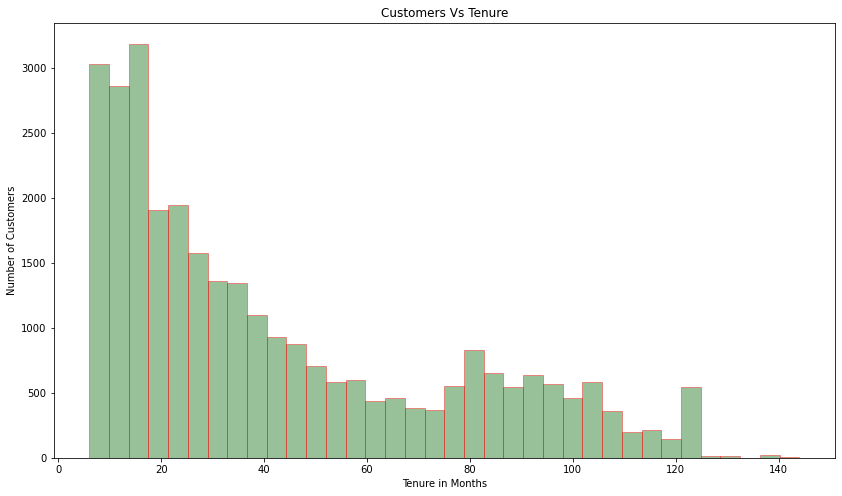

In [66]:
plt.figure(figsize=(14,8))
# aon --> Age on network - number of days the customer is using the operator T network
tenure_data['tenure'] = tenure_data['aon']/30
tenure_data['tenure'].head()
ax = sns.distplot(tenure_data['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkgreen', 
             hist_kws={'edgecolor':'red'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()

In [67]:
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_data['tenure_range'] = pd.cut(tenure_data['tenure'], tn_range, labels=tn_label)
tenure_data['tenure_range'].head()

7         2-5 Yrs
8     6-12 Months
13            NaN
16        1-2 Yrs
17        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

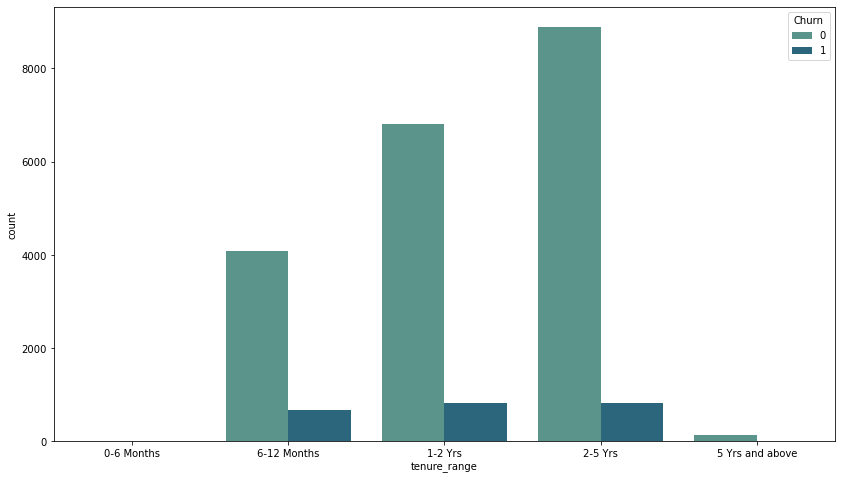

In [68]:
plt.figure(figsize=(14,8))
sns.countplot(x = 'tenure_range', hue = 'Churn',data = tenure_data, palette=("crest"))
plt.show()

From the above analysis, we can observe that the customers who churn are having similar tenure 

## Step 4 :Deriving new features 

In [69]:
## Keeping a copy of the processed data

new_telecom_data = processed_data.copy()
new_telecom_data.shape

(30011, 112)

In [70]:
## Dropping the date columns

new_telecom_data.drop(processed_date_col, axis=1, inplace=True)
new_telecom_data.shape

(30011, 109)

In [71]:
# Derived variables to measure change in usage 

# Usage 
new_telecom_data['derived_vol_2g'] = new_telecom_data['vol_2g_mb_8'] - new_telecom_data['vol_2g_mb_6'].add(new_telecom_data['vol_2g_mb_7']).div(2)

new_telecom_data['derived_vol_3g'] = new_telecom_data['vol_3g_mb_8'] - new_telecom_data['vol_3g_mb_6'].add(new_telecom_data['vol_3g_mb_7']).div(2)
new_telecom_data['derived_vbc_3g'] = new_telecom_data['aug_vbc_3g'] - new_telecom_data['jun_vbc_3g'].add(new_telecom_data['jul_vbc_3g']).div(2)

# Revenue 
new_telecom_data['derived_arpu'] = new_telecom_data['arpu_8'] - new_telecom_data['arpu_6'].add(new_telecom_data['arpu_7']).div(2)
new_telecom_data['derived_total_rech_amt'] = new_telecom_data['total_rech_amt_8'] - new_telecom_data['total_rech_amt_6'].add(new_telecom_data['total_rech_amt_7']).div(2)

In [72]:
new_telecom_data.shape

(30011, 114)

In [73]:
new_telecom_data.drop(columns=[
 'vol_2g_mb_8', 'vol_2g_mb_6', 'vol_2g_mb_7',
  'vol_3g_mb_8'  , 'vol_3g_mb_6', 'vol_3g_mb_7' ,
    'aug_vbc_3g','jun_vbc_3g','jul_vbc_3g',
    'arpu_8','arpu_6','arpu_7',
    'total_rech_amt_8', 'total_rech_amt_6', 'total_rech_amt_7'
    
], inplace=True, axis=1)

new_telecom_data.shape

(30011, 99)

In [74]:
## Checking the NA% again for our features

((new_telecom_data.isnull().sum()/new_telecom_data.index.size)*100).sort_values(ascending=False)

ic_others_8               3.125521
og_others_8               3.125521
ic_others_6               1.052947
og_others_6               1.052947
ic_others_7               1.009630
og_others_7               1.009630
mobile_number             0.000000
spl_ic_mou_7              0.000000
total_rech_num_7          0.000000
total_rech_num_6          0.000000
isd_ic_mou_8              0.000000
isd_ic_mou_7              0.000000
isd_ic_mou_6              0.000000
spl_ic_mou_8              0.000000
std_ic_t2f_mou_8          0.000000
spl_ic_mou_6              0.000000
max_rech_amt_6            0.000000
std_ic_t2f_mou_7          0.000000
std_ic_t2f_mou_6          0.000000
std_ic_t2m_mou_8          0.000000
std_ic_t2m_mou_7          0.000000
std_ic_t2m_mou_6          0.000000
std_ic_t2t_mou_8          0.000000
std_ic_t2t_mou_7          0.000000
total_rech_num_8          0.000000
max_rech_amt_7            0.000000
loc_ic_t2f_mou_8          0.000000
monthly_3g_8              0.000000
derived_arpu        

In [75]:
## Imputing NA values with 0 as the NA or Null means no data is there for those numeric features

new_telecom_data.fillna(0, inplace=True)

## Checking the NA% again for our features

print(((new_telecom_data.isnull().sum()/new_telecom_data.index.size)*100).sort_values(ascending=False))

mobile_number             0.0
max_rech_amt_7            0.0
total_rech_num_8          0.0
total_rech_num_7          0.0
total_rech_num_6          0.0
ic_others_8               0.0
ic_others_7               0.0
ic_others_6               0.0
isd_ic_mou_8              0.0
isd_ic_mou_7              0.0
isd_ic_mou_6              0.0
spl_ic_mou_8              0.0
spl_ic_mou_7              0.0
spl_ic_mou_6              0.0
std_ic_t2f_mou_8          0.0
std_ic_t2f_mou_7          0.0
std_ic_t2f_mou_6          0.0
std_ic_t2m_mou_8          0.0
std_ic_t2m_mou_7          0.0
std_ic_t2m_mou_6          0.0
std_ic_t2t_mou_8          0.0
std_ic_t2t_mou_7          0.0
std_ic_t2t_mou_6          0.0
max_rech_amt_6            0.0
max_rech_amt_8            0.0
loc_ic_t2f_mou_7          0.0
last_day_rch_amt_6        0.0
derived_arpu              0.0
derived_vbc_3g            0.0
derived_vol_3g            0.0
derived_vol_2g            0.0
Churn                     0.0
avg_rech_good_phase       0.0
aon       

In [76]:
new_telecom_data.shape

(30011, 99)

## Step 5 : PCA Model Building & Evaluating

### PCA (Principle Component Analysis)

In [77]:
## Copying the data to create the PCA model

pca_telecom_data = new_telecom_data.copy()

In [78]:
pca_telecom_data.shape

(30011, 99)

In [79]:
## Initializing all variables to X except of the target variable and y to the target variable. Dropping mobile number feature 
## as this is like a unique ID which is not required for our analysis

X = pca_telecom_data.drop(['Churn', 'mobile_number'], axis=1)
y = pca_telecom_data.Churn

### Class Imbalance

In [80]:
y.value_counts(normalize=True)

0    0.913598
1    0.086402
Name: Churn, dtype: float64

In [81]:
# Ratio of classes 

class_0 = y[y == 0].count()
class_1 = y[y == 1].count()

print(f'Class Imbalance Ratio : {round(class_1/class_0,3)}')

Class Imbalance Ratio : 0.095


In [82]:
## Splitting the dataset into Train and Test 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, train_size=0.7)

In [83]:
pca_model = PCA(random_state=28)
pca_model.fit(X_train)
pca_model.components_

array([[ 1.98970013e-01,  2.41589334e-01,  2.19075068e-01, ...,
         1.22157075e-03, -8.04028034e-03, -9.08720214e-03],
       [-1.98669638e-01, -2.18039194e-01, -1.82064862e-01, ...,
         4.73245875e-03,  2.41021035e-02,  2.14954440e-02],
       [ 2.75606431e-01,  3.40675309e-01,  3.36961389e-01, ...,
         1.29977286e-02,  5.21422571e-02,  5.49844549e-02],
       ...,
       [-4.99359027e-04, -7.44611760e-04,  6.97289611e-04, ...,
        -2.19113540e-05,  1.35445160e-04,  1.10848863e-04],
       [-2.86141541e-04,  1.40806852e-04,  1.62269882e-04, ...,
        -2.95037977e-06, -1.63355970e-07, -3.36659880e-06],
       [ 2.24704973e-05, -2.24593581e-04, -1.35515337e-05, ...,
        -1.33072839e-06, -6.77276313e-07, -7.46763521e-06]])

Looking at the explained variance ratio for each component

In [84]:
pca_model.explained_variance_ratio_

array([2.11023858e-01, 1.70951054e-01, 1.59766297e-01, 8.44180403e-02,
       6.10034083e-02, 5.76926678e-02, 3.61853208e-02, 2.80357048e-02,
       2.70677695e-02, 2.09739342e-02, 1.48405118e-02, 1.29139176e-02,
       1.15120947e-02, 1.03108553e-02, 1.00903137e-02, 9.67819762e-03,
       8.84998067e-03, 6.18961722e-03, 5.73527395e-03, 5.13551750e-03,
       4.89829985e-03, 4.72855472e-03, 4.04703854e-03, 2.81288319e-03,
       2.58968003e-03, 2.49812280e-03, 2.44391625e-03, 2.32480993e-03,
       2.03387522e-03, 1.82198984e-03, 1.74724662e-03, 1.55692804e-03,
       1.46752915e-03, 1.30921121e-03, 1.22696875e-03, 1.13991895e-03,
       1.02100858e-03, 9.87123123e-04, 9.67453864e-04, 8.94522660e-04,
       7.29279171e-04, 5.77780358e-04, 5.18559899e-04, 4.09799130e-04,
       4.02808639e-04, 3.21008907e-04, 2.71962297e-04, 2.47071391e-04,
       2.22438083e-04, 1.85850442e-04, 1.80643496e-04, 1.35965593e-04,
       1.27708294e-04, 1.12412449e-04, 1.01588229e-04, 9.13750197e-05,
      

#### Making a scree plot for the explained variance

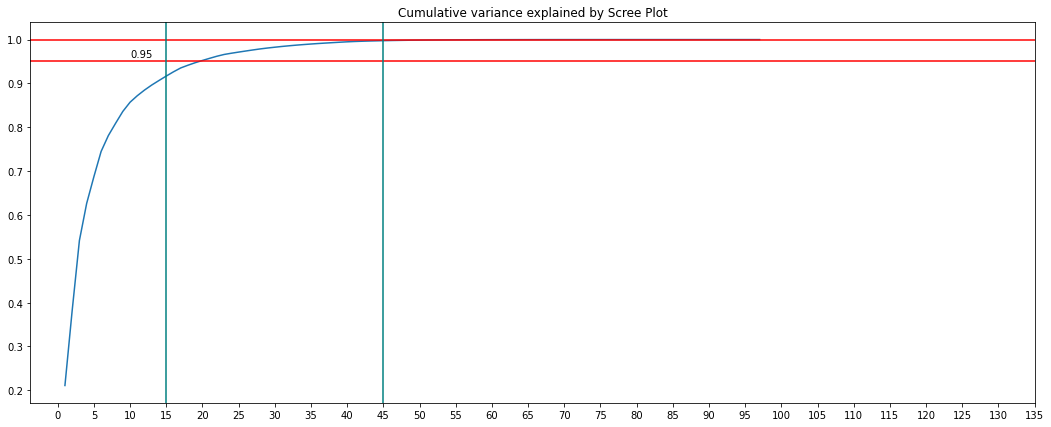

In [86]:
## Calculating the cumulative sum for the plotting the PCA plot

cum_sum = np.cumsum(pca_model.explained_variance_ratio_)

## Here we will plot the scree plot

plt.figure(figsize=(18,7))
sns.lineplot(np.arange(1,len(cum_sum) + 1), cum_sum)
plt.xticks(np.arange(0, 140, 5))
plt.axhline(0.95, color='r')
plt.axhline(1.0, color='r')
plt.axvline(15, color='teal')
plt.axvline(45, color='teal')
plt.text(10, 0.96, '0.95')

plt.title('Cumulative variance explained by Scree Plot');

From the above plot we can oberserve :

* 100% Variance is well explained by the intial 45 components
* We can observe initial 16 components have around 95% of the variance which is explained from these components

#### Performing PCA on the inital 45 components

In [87]:
pca_model_final = PCA(random_state=100, n_components = 45)

In [88]:
## Creating the PCA transformed dataset

final_pca_data = pca_model_final.fit_transform(X_train)

In [89]:
## Transforming into final PCA transformed dataset

X_train_pca = pd.DataFrame(final_pca_data, columns=["PC_"+str(x) for x in range(1,46)], index = X_train.index)
train_pca_data = pd.concat([X_train_pca, y_train], axis=1)
train_pca_data.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45,Churn
4715,729.302750,-914.797512,-478.624774,165.564391,-224.406051,-213.603443,-31.850381,-96.218375,-95.817487,-23.723704,-63.850428,109.284901,80.928550,-39.326138,57.153075,68.013714,-111.677908,20.156879,-19.174641,-19.951992,116.911583,-28.159645,-12.882108,3.393197,38.439824,-44.098107,18.168550,9.046436,10.431265,-5.983294,3.039006,-6.033951,-6.514050,3.459289,-0.077846,3.714187,4.094171,-0.554805,5.921869,13.417863,-44.345324,2.793544,-3.985465,0.312141,-5.435718,0
15222,-391.179990,-274.956537,-579.824856,314.864191,137.155283,98.307546,-3.950911,-87.521233,-17.278618,44.846691,187.128891,29.642876,-37.573369,35.359661,-209.399928,62.936084,36.539074,-49.172294,-70.669284,104.431516,-16.173669,66.005011,-53.225551,101.276764,0.566856,8.531430,-19.041251,113.226653,-27.697352,111.232023,45.471678,-44.796799,-26.342449,-21.123664,79.427074,23.858079,85.478042,-14.377520,-88.407144,-11.908826,-8.889034,-2.569968,-2.158887,0.939829,3.990210,0
60145,-1139.102054,250.515786,276.112773,110.403749,-85.677858,104.261232,-93.247419,-145.489190,65.936563,-203.751972,-200.807256,-129.356112,6.539698,29.151334,138.536488,177.698554,-49.259192,176.469453,-26.904855,-187.000964,12.543685,-64.782847,-58.503080,-111.237859,325.180988,928.611621,457.679952,-105.183286,-117.864376,69.395905,57.472918,-3.220428,-42.119723,23.205900,-21.627952,-41.668896,-60.177872,-9.211353,-4.000400,24.796103,0.531942,0.609903,-8.520777,-45.769003,-11.043035,0
62445,-765.351670,908.323718,830.619910,35.841618,-356.014226,-357.320483,508.777516,114.687063,101.517266,1.488172,-218.381850,296.326857,116.462594,5.828985,51.636939,189.368283,-28.849693,-32.196115,-80.722586,-33.355257,52.597224,-57.275334,3.245778,-198.494760,-32.626768,26.341722,-110.371228,-33.324353,-1.855048,17.328870,-14.256488,-12.579232,-26.117520,-15.555904,-9.156578,-7.487970,-8.833896,-13.535113,-7.888556,-19.605812,34.579321,36.677598,8.508299,-3.667639,1.982750,0
88349,412.322673,-183.774321,-837.006000,-273.454919,221.520833,-103.345974,-16.037272,-123.312772,-99.377923,-94.449831,-38.829881,157.119301,51.628687,26.231954,106.912939,144.950620,-0.748964,-57.246691,-65.944611,-45.499835,43.483615,3.201751,-6.522987,71.997082,-5.980101,7.147087,-44.033788,-8.730953,-19.238235,4.187972,-50.657868,-16.012609,-7.003894,-33.387827,3.354141,-24.096684,2.629535,45.603427,-18.113594,-3.068424,28.341256,1.381958,4.383327,23.023841,2.494025,0


In [90]:
## Checking the churn % again 

train_pca_data.Churn.value_counts(normalize=True)

0    0.913219
1    0.086781
Name: Churn, dtype: float64

We have retained around 8% of churned customers after PCA dimension reduction as well

### PCA & Logistic Regression Model 

In [91]:
## Initializing X and y train as per PCA

X_train_pca = train_pca_data.drop(['Churn'], axis=1)
y_train_pca = train_pca_data.Churn

In [92]:
X_train_pca.head(3)

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,PC_16,PC_17,PC_18,PC_19,PC_20,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,PC_31,PC_32,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42,PC_43,PC_44,PC_45
4715,729.302750,-914.797512,-478.624774,165.564391,-224.406051,-213.603443,-31.850381,-96.218375,-95.817487,-23.723704,-63.850428,109.284901,80.928550,-39.326138,57.153075,68.013714,-111.677908,20.156879,-19.174641,-19.951992,116.911583,-28.159645,-12.882108,3.393197,38.439824,-44.098107,18.168550,9.046436,10.431265,-5.983294,3.039006,-6.033951,-6.514050,3.459289,-0.077846,3.714187,4.094171,-0.554805,5.921869,13.417863,-44.345324,2.793544,-3.985465,0.312141,-5.435718
15222,-391.179990,-274.956537,-579.824856,314.864191,137.155283,98.307546,-3.950911,-87.521233,-17.278618,44.846691,187.128891,29.642876,-37.573369,35.359661,-209.399928,62.936084,36.539074,-49.172294,-70.669284,104.431516,-16.173669,66.005011,-53.225551,101.276764,0.566856,8.531430,-19.041251,113.226653,-27.697352,111.232023,45.471678,-44.796799,-26.342449,-21.123664,79.427074,23.858079,85.478042,-14.377520,-88.407144,-11.908826,-8.889034,-2.569968,-2.158887,0.939829,3.990210
60145,-1139.102054,250.515786,276.112773,110.403749,-85.677858,104.261232,-93.247419,-145.489190,65.936563,-203.751972,-200.807256,-129.356112,6.539698,29.151334,138.536488,177.698554,-49.259192,176.469453,-26.904855,-187.000964,12.543685,-64.782847,-58.503080,-111.237859,325.180988,928.611621,457.679952,-105.183286,-117.864376,69.395905,57.472918,-3.220428,-42.119723,23.205900,-21.627952,-41.668896,-60.177872,-9.211353,-4.000400,24.796103,0.531942,0.609903,-8.520777,-45.769003,-11.043035


In [93]:
y_train_pca.head(3)

4715     0
15222    0
60145    0
Name: Churn, dtype: int64

In [94]:
## Initializing test set as per PCA

X_test_pca = pca_model_final.transform(X_test)

In [95]:
## Logistic Regression model

lr_pca = LogisticRegression(random_state=100, class_weight='balanced')
lr_pca.fit(X_train_pca, y_train_pca)

LogisticRegression(class_weight='balanced', random_state=100)

In [96]:
## Making Predictions on Train 

y_train_pred = lr_pca.predict(X_train_pca)
y_train_pred[:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [97]:
## Making Predictions on Test 

y_test_pred = lr_pca.predict(X_test_pca)
y_train_pred[:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

### PCA Model Evaluation

In [98]:
## User defined function to evaluate using confusion metrics

def get_model_matrix(matrix) :
    
    TN = matrix[0][0]
    TP = matrix[1][1]
    FP = matrix[0][1]
    FN = matrix[1][0]
    
    ## Calculating Accuracy, Sensitivity, Specificity, Precision and F1 Score
    
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    sensitivity = round(TP/float(FN + TP),3)
    specificity = round(TN/float(TN + FP),3)    
    precision = round(TP/float(TP + FP),3)
    
    print('Accuracy    : ' , accuracy)
    print('Sensitivity : ', sensitivity)
    print('Specificity : ', specificity)
    print('Precision   : ', precision)
    print('F1-score    : ', round(2*precision*sensitivity/(precision + sensitivity),3))

#### Evaluating Train 

In [99]:
## Creating confusion metrics on Train

train_confusion = metrics.confusion_matrix(y_train, y_train_pred)
train_confusion

array([[10904,  8280],
       [  146,  1677]], dtype=int64)

In [100]:
## Let us get the Accuracy, Sensitivity and Specificity

get_model_matrix(train_confusion)

Accuracy    :  0.599
Sensitivity :  0.92
Specificity :  0.568
Precision   :  0.168
F1-score    :  0.284


#### Evaluating Train

In [101]:
## Creating confusion metrics on Train

test_confusion = metrics.confusion_matrix(y_test, y_test_pred)
test_confusion

array([[4703, 3531],
       [  53,  717]], dtype=int64)

In [102]:
## Let us get the Accuracy, Sensitivity and Specificity

get_model_matrix(test_confusion)

Accuracy    :  0.602
Sensitivity :  0.931
Specificity :  0.571
Precision   :  0.169
F1-score    :  0.286


#### Hyperparameter Tuning

In [103]:
## Initializing parameters
params = {
    'penalty' : ['l1','l2','none'], 
    'C' : [0,1,2,3,4,5,10,50]
}

## Creating K-fold
folds = StratifiedKFold(random_state=100, n_splits=5, shuffle=True)

In [104]:
## Using GridSearchCV

grid_search = GridSearchCV(cv=folds, estimator = lr_pca, param_grid=params,scoring='roc_auc', verbose=True, n_jobs=-1)
grid_search.fit(X_train_pca, y_train_pca)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=-1,
             param_grid={'C': [0, 1, 2, 3, 4, 5, 10, 50],
                         'penalty': ['l1', 'l2', 'none']},
             scoring='roc_auc', verbose=True)

In [105]:
grid_search.best_score_

0.8682449470845072

In [106]:
grid_search.best_params_

{'C': 1, 'penalty': 'l2'}

#### Model Building using Hyperparameters Tuning

In [107]:
pca_tuned = grid_search.best_estimator_
pca_tuned_model = pca_tuned.fit(X_train_pca, y_train_pca)
pca_tuned_model

LogisticRegression(C=1, class_weight='balanced', random_state=100)

In [108]:
## Predicting on tuned model for Train

y_train_tuned_pred = pca_tuned_model.predict(X_train_pca)
y_train_tuned_pred[:10]

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [109]:
## Predicting on tuned model for Test

y_test_tuned_pred = pca_tuned_model.predict(X_test_pca)
y_test_tuned_pred[:10]

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

Evaluating Train

In [110]:
## Creating confusion metrics on Train

new_train_confusion_metrics = metrics.confusion_matrix(y_train, y_train_tuned_pred)
new_train_confusion_metrics

array([[10904,  8280],
       [  146,  1677]], dtype=int64)

In [112]:
## Let us get the Accuracy, Sensitivity and Specificity

get_model_matrix(new_train_confusion_metrics)

Accuracy    :  0.599
Sensitivity :  0.92
Specificity :  0.568
Precision   :  0.168
F1-score    :  0.284


Evaluating Test

In [113]:
## Creating confusion metrics on Test

new_test_confusion_metrics = metrics.confusion_matrix(y_test, y_test_tuned_pred)
new_test_confusion_metrics

array([[4703, 3531],
       [  53,  717]], dtype=int64)

In [114]:
## Let us get the Accuracy, Sensitivity and Specificity

get_model_matrix(new_test_confusion_metrics)

Accuracy    :  0.602
Sensitivity :  0.931
Specificity :  0.571
Precision   :  0.169
F1-score    :  0.286


### PCA & XGBoost Model

In [115]:
xgb_pca = xgb.XGBClassifier(random_state=100, objective= 'binary:logistic', scale_pos_weight= class_0/class_1, 
                            tree_method='hist', n_jobs = -1)
xgb_pca.fit(X_train_pca, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=100, ...)

In [116]:
## Train set AUC curve

roc_auc_score(y_train, xgb_pca.predict_proba(X_train_pca)[:,1])

0.9999964543501006

In [117]:
## Test set AUC curve

roc_auc_score(y_test, xgb_pca.predict_proba(X_test_pca)[:,1])

0.886054496875483

We are getting a pretty good AUC (Area Under Curve) score on the test set. Let us still hypertune the parameters

In [118]:
## Hyper Tuning the parameter 

parameters = {
              'learning_rate': [0.1, 0.2, 0.3],
              'gamma' : [10,20,50],
              'max_depth': [2,3,4],
              'min_child_weight': [25,50],
              'n_estimators': [150,200,500]}

In [119]:
## GridSearchCV

pca_xgb_search = GridSearchCV(estimator = xgb_pca , param_grid = parameters,scoring='roc_auc', cv=folds, n_jobs=-1, verbose=1)
pca_xgb_search.fit(X_train_pca, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_ty...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=-1,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=100, ...),
             n_jobs=-1,
             param_grid={'gamma': [10, 20, 50],
                         'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [2, 3, 4], 'min_child_weight': [25, 50],
                         'n_estimators': [150, 200, 500]},
             scoring='roc_auc', verbose=1)

In [120]:
# Optimum Hyperparameters
print('Best ROC-AUC score :', pca_xgb_search.best_score_)
print('Best Parameters :', pca_xgb_search.best_params_)

Best ROC-AUC score : 0.8886338676874737
Best Parameters : {'gamma': 10, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 50, 'n_estimators': 500}


Using XGBoost best estimators along with PCA to build a new model

In [121]:
xgboost_pca_model = pca_xgb_search.best_estimator_
xgboost_pca_model_fit = xgboost_pca_model.fit(X_train_pca, y_train)

In [122]:
# Prediction on Train set

y_train_pred_xgb = xgboost_pca_model_fit.predict(X_train_pca)
y_train_pred_xgb[:5]

array([0, 0, 0, 0, 1])

In [123]:
# Prediction on test set

X_test_pca = pca_model_final.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, index=X_test.index, columns = X_train_pca.columns)
y_test_pred_pca_xgb_best = xgboost_pca_model_fit.predict(X_test_pca)
y_test_pred_pca_xgb_best[:5]

array([1, 1, 0, 0, 0])

#### Model Evaluation

Evaluating on Train Data

In [124]:
## Creating confusion metrics on Train

new_train_confusion_metrics = metrics.confusion_matrix(y_train, y_train_tuned_pred)
new_train_confusion_metrics

array([[10904,  8280],
       [  146,  1677]], dtype=int64)

In [127]:
## Let us get the Accuracy, Sensitivity and Specificity

get_model_matrix(new_train_confusion_metrics)

Accuracy    :  0.599
Sensitivity :  0.92
Specificity :  0.568
Precision   :  0.168
F1-score    :  0.284


In [128]:
print('Train AUC Score : ', roc_auc_score(y_train, pca_xgb_search.predict_proba(X_train_pca)[:, 1]))

Train AUC Score :  0.9353252870718284


Evaluating on Test Data

In [129]:
## Creating confusion metrics on Test

new_test_confusion_metrics = metrics.confusion_matrix(y_test, y_test_tuned_pred)
new_test_confusion_metrics

array([[4703, 3531],
       [  53,  717]], dtype=int64)

In [130]:
## Let us get the Accuracy, Sensitivity and Specificity

get_model_matrix(new_test_confusion_metrics)

Accuracy    :  0.602
Sensitivity :  0.931
Specificity :  0.571
Precision   :  0.169
F1-score    :  0.286


In [131]:
print('Test AUC Score : ', roc_auc_score(y_test, pca_xgb_search.predict_proba(X_test_pca)[:, 1]))

Test AUC Score :  0.9006108659375601


### PCA & RandomForest Model

In [132]:
## Creating a random forest classifier Model

pca_rf = RandomForestClassifier(random_state=100, class_weight= {0 : class_1/(class_0 + class_1) , 1 : class_0/(class_0 + class_1) } , oob_score=True, n_jobs=-1,verbose=1)
pca_rf

RandomForestClassifier(class_weight={0: 0.08640165272733331,
                                     1: 0.9135983472726666},
                       n_jobs=-1, oob_score=True, random_state=100, verbose=1)

In [133]:
# Hyper parameter Tuning

params = {
    'n_estimators'  : [30,40,50,100],
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [15,20,25,30]
}
folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
pca_rf_model_search = GridSearchCV(estimator=pca_rf, param_grid=params, 
                                   cv=folds, scoring='roc_auc', verbose=True, n_jobs=-1 )

In [134]:
pca_rf_model_search.fit(X_train_pca, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.0s finished


GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.08640165272733331,
                                                            1: 0.9135983472726666},
                                              n_jobs=-1, oob_score=True,
                                              random_state=100, verbose=1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [15, 20, 25, 30],
                         'n_estimators': [30, 40, 50, 100]},
             scoring='roc_auc', verbose=True)

In [135]:
## Optimum Hyperparameters

print('Best ROC-AUC score :', pca_rf_model_search.best_score_)
print('Best Parameters :', pca_rf_model_search.best_params_)

Best ROC-AUC score : 0.8758015224856425
Best Parameters : {'max_depth': 7, 'min_samples_leaf': 20, 'n_estimators': 100}


In [136]:
## Modelling using the best PCA-RandomForest Estimator 

pca_rf_best = pca_rf_model_search.best_estimator_
pca_rf_best_fit = pca_rf_best.fit(X_train_pca, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.2s finished


In [137]:
## Prediction on Train set

y_train_pred_pca_rf_best = pca_rf_best_fit.predict(X_train_pca)
y_train_pred_pca_rf_best[:10]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0], dtype=int64)

In [138]:
## Prediction on Test set

y_test_pred_pca_rf_best = pca_rf_best_fit.predict(X_test_pca)
y_test_pred_pca_rf_best[:10]

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


array([1, 1, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

### Model Evaluation

Evaluating on Train dataset

In [141]:
## Creating confusion metrics on Train

new_train_confusion_metrics = metrics.confusion_matrix(y_train, y_train_pred_pca_rf_best)
new_train_confusion_metrics

array([[17157,  2027],
       [  343,  1480]], dtype=int64)

In [142]:
## Let us get the Accuracy, Sensitivity and Specificity

get_model_matrix(new_train_confusion_metrics)

Accuracy    :  0.887
Sensitivity :  0.812
Specificity :  0.894
Precision   :  0.422
F1-score    :  0.555


Evaluating on Test dataset

In [143]:
## Creating confusion metrics on Test

new_test_confusion_metrics = metrics.confusion_matrix(y_test, y_test_pred_pca_rf_best)
new_test_confusion_metrics

array([[7313,  921],
       [ 220,  550]], dtype=int64)

In [144]:
## Let us get the Accuracy, Sensitivity and Specificity

get_model_matrix(new_test_confusion_metrics)

Accuracy    :  0.873
Sensitivity :  0.714
Specificity :  0.888
Precision   :  0.374
F1-score    :  0.491


In [145]:
## Out of bag error 

pca_rf_best_fit.oob_score_

0.8675679535392964

From the above models, we have build models with PCA and have got pretty fine models with expected results. These models can be used to predict if any customer has churned or not.

The above models will only be able to achieve one of the two goals - to predict customers who will churn. You can’t use the above model to identify the important features for churn. That’s because PCA usually creates components which are not easy to interpret.

Therefore, we will build another model with the main objective of identifying important predictor attributes which help the business understand indicators of churn.

## Step 6 : Logistic Regression Model to identify important features

In [146]:
## Checking for Categorical variable using unique count of values

df = pd.DataFrame({'UniqueValueCount':new_telecom_data.nunique().astype(int) })
df.sort_values(by="UniqueValueCount")
df_cat = df.reset_index()
df_cat = df_cat.rename(columns={"index":"Column Name"})
category_vars = list(df_cat[df_cat['UniqueValueCount']<=40]['Column Name'])

##### From above variables, removing the predictive 'Churn' variable

In [147]:
category_vars.remove('Churn')
category_vars

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_7',
 'sachet_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8']

In [148]:
df_cat

,Column Name,UniqueValueCount
0,mobile_number,30011
1,onnet_mou_6,18813
2,onnet_mou_7,18938
3,onnet_mou_8,17604
4,offnet_mou_6,22454
5,offnet_mou_7,22650
6,offnet_mou_8,21513
7,roam_ic_mou_6,4338
8,roam_ic_mou_7,3649
9,roam_ic_mou_8,3655


##### Since the variables considered under categorical type have upto 40 different values minimum, we will merge the less significant types or ones with few rows together as others

In [149]:
# Checking and grouping categories with less than 1% contribution in each column into "Others"

for var in category_vars : 
    count = 100*new_telecom_data[var].value_counts(normalize=True)
    low_count = count[count <= 1].index.to_list()
    new_telecom_data[var].replace(low_count,'Others',inplace=True)

In [150]:
new_telecom_data.head()

,mobile_number,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,avg_rech_good_phase,Churn,derived_vol_2g,derived_vol_3g,derived_vbc_3g,derived_arpu,derived_total_rech_amt
7,7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,0,0,0,0,0,0,0,0,0,0,0,0,802,1185.0,1,0.00,0.000,38.680,1961.9650,2453.0
8,7001524846,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,0,1,0,0,1,3,0,0,0,0,0,0,315,519.0,0,-177.97,-363.535,-495.375,-298.1100,-399.0
13,7002191713,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,110,110,130,110,50,0,0,0,0,0,0,3,0,0,0,0,0,0,2607,380.0,0,0.02,0.000,0.000,244.0015,337.0
16,7000875565,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.00,0.0,0.0,0.00,0.00,0.23,0.00,0.00,0.00,10,6,2,110,110,130,100,100,130,0,0,0,0,0,0,0,0,0,0,0,0,511,459.0,0,0.00,0.000,-12.170,-177.5280,-299.0
17,7000187447,1185.91,9.28,7.79,61.64,0.00,5.54,0.00,4.76,4.81,0.00,8.46,13.34,38.99,0.00,0.00,58.54,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,1146.91,0.81,0.00,1.55,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,2.58,0.00,0.00,0.93,0.0,0.0,34.54,0.00,0.00,47.41,2.31,0.00,0.00,0.00,0.00,8.63,0.00,0.00,1.28,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,2,4,110,0,30,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,667,408.0,0,0.00,0.000,0.000,-328.9950,-378.0


### Creating dummy variables for categorical columns

In [151]:
dummyVars = pd.get_dummies(new_telecom_data[category_vars], drop_first=False, prefix=category_vars)
dummyVars.head()

,monthly_2g_6_0,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_6_Others,monthly_2g_7_0,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_7_Others,monthly_2g_8_0,monthly_2g_8_1,monthly_2g_8_Others,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_6_Others,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_7_Others,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,sachet_2g_8_Others,monthly_3g_6_0,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_6_Others,monthly_3g_7_0,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_7_Others,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,monthly_3g_8_Others,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_6_Others,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_7_Others,sachet_3g_8_0,sachet_3g_8_1,sachet_3g_8_Others
7,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
8,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
13,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
16,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
17,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0


In [152]:
## We can remove dummy variables for other category as these are less relevant

cols = dummyVars.filter(regex='.*Others$').columns.to_list() 
dummyVars.drop(columns=cols, inplace=True)

In [153]:
##  Dropping original categorical columns

new_telecom_data.drop(columns=category_vars, inplace=True)
new_telecom_data.head(3)

,mobile_number,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,avg_rech_good_phase,Churn,derived_vol_2g,derived_vol_3g,derived_vbc_3g,derived_arpu,derived_total_rech_amt
7,7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,802,1185.0,1,0.00,0.000,38.680,1961.9650,2453.0
8,7001524846,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,315,519.0,0,-177.97,-363.535,-495.375,-298.1100,-399.0
13,7002191713,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.00,1.29,0.0,0.0,4.78,0.0,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,110,110,130,110,50,0,2607,380.0,0,0.02,0.000,0.000,244.0015,337.0


In [154]:
## Concatenating dummy variables with dataset

new_telecom_data = pd.concat([new_telecom_data, dummyVars], axis=1)
new_telecom_data.head()

,mobile_number,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,avg_rech_good_phase,Churn,derived_vol_2g,derived_vol_3g,derived_vbc_3g,derived_arpu,derived_total_rech_amt,monthly_2g_6_0,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_7_0,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_8_0,monthly_2g_8_1,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,monthly_3g_6_0,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_7_0,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_8_0,sachet_3g_8_1
7,7000701601,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,1580,0,0,779,802,1185.0,1,0.00,0.000,38.680,1961.9650,2453.0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
8,7001524846,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,90,154,30,50,0,10,315,519.0,0,-177.97,-363.535,-495.375,-298.1100,-399.0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
13,7002191713,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,110,110,130,110,50,0,2607,380.0,0,0.02,0.000,0.000,244.0015,337.0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
16,7000875565,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0.0,0.0,0.00,7.89,2.58,3.23,22.99,64.51,18.29,0.00,0.00,0.00,0.0,0.00,0.00,0.00,3.26,5.91,0.00,0.0,0.0,41.33,71.44,28.89,226.81,149.69,150.16,8.71,8.68,32.71,68.79,78.64,6.33,18.68,73.08,73.93,0.51,0.00,2.18,0.00,0.0,0.0,0.00,0.00,0.2

In [155]:
## Checking the shape of merged dataset

new_telecom_data.shape

(30011, 129)

### Train-Test Split

In [192]:
X = new_telecom_data.drop(['Churn', 'mobile_number'] , axis=1)
y = new_telecom_data['Churn']

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=100)

##### Checking Class imbalance

In [194]:
100*y[y == 1].count()/y[y == 0].count()

9.457290830841053

#### To account for class imbalance, we are using ADASYN

In [242]:
ada = ADASYN(random_state=42, n_neighbors=5)

## Resampling Train set to account for class imbalance

X_train_resampled, y_train_resampled = ada.fit_resample(X_train, y_train)

In [243]:
X_train_resampled.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,aon,avg_rech_good_phase,derived_vol_2g,derived_vol_3g,derived_vbc_3g,derived_arpu,derived_total_rech_amt,monthly_2g_6_0,monthly_2g_6_1,monthly_2g_6_2,monthly_2g_7_0,monthly_2g_7_1,monthly_2g_7_2,monthly_2g_8_0,monthly_2g_8_1,sachet_2g_6_0,sachet_2g_6_1,sachet_2g_6_2,sachet_2g_6_3,sachet_2g_6_4,sachet_2g_7_0,sachet_2g_7_1,sachet_2g_7_2,sachet_2g_7_3,sachet_2g_7_4,sachet_2g_7_5,sachet_2g_8_0,sachet_2g_8_1,sachet_2g_8_2,sachet_2g_8_3,sachet_2g_8_4,sachet_2g_8_5,monthly_3g_6_0,monthly_3g_6_1,monthly_3g_6_2,monthly_3g_7_0,monthly_3g_7_1,monthly_3g_7_2,monthly_3g_8_0,monthly_3g_8_1,monthly_3g_8_2,sachet_3g_6_0,sachet_3g_6_1,sachet_3g_6_2,sachet_3g_7_0,sachet_3g_7_1,sachet_3g_7_2,sachet_3g_8_0,sachet_3g_8_1
0,336.33,564.78,424.11,154.94,71.08,88.14,0.0,0.0,0.0,0.0,0.0,0.0,1.01,3.26,8.53,1.66,1.93,1.61,0.00,0.00,0.00,9.06,0.0,0.0,335.31,561.51,415.58,124.21,61.89,86.53,0.0,0.00,0.0,0.00,0.00,0.00,32.23,7.25,2.93,0.0,0.0,0.0,2.13,7.41,1.88,9.28,21.31,4.59,0.00,0.00,0.00,71.18,65.58,62.44,41.46,60.36,108.03,0.0,0.00,0.00,0.15,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,19,24,25,30,70,50,0,20,10,353,461.5,-105.600,0.00,0.000,-19.1385,-11.5,1,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
1,110.08,27.54,131.03,220.86,117.84,168.99,0.0,0.0,0.0,0.0,0.0,0.0,110.08,27.54,131.03,192.11,84.44,110.08,22.74,30.41,55.38,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,6.00,2.98,3.53,0.0,0.0,0.0,19.99,11.64,37.89,481.34,235.29,245.94,94.66,38.53,167.86,3.75,2.93,0.00,0.00,0.00,0.00,0.0,0.98,0.40,0.00,0.0,0.0,8.01,12.51,10.94,0.0,0.00,0.00,5,7,3,110,198,198,110,110,198,1076,464.0,47.035,189.89,112.165,66.0510,-6.0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
2,26.19,83.34,84.73,206.61,538.99,411.43,0.0,0.0,0.0,0.0,0.0,0.0,26.19,83.34,84.73,202.36,521.28,409.48,4.25,7.53,1.56,0.00,0.0,0.0,0.00,0.00,0.00,0.00,10.18,0.38,0.0,0.00,0.0,0.81,11.78,0.79,0.00,0.00,0.00,0.0,0.0,0.0,29.46,55.41,43.34,106.99,269.23,178.04,1.78,4.86,1.28,0.00,0.00,0.00,4.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,439.49,914.56,551.83,0.0,0.00,0.00,12,16,15,30,120,50,30,120,50,2282,615.5,0.000,0.00,0.000,16.6625,31.5,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
3,177.03,419.24,108.21,641.28,609.36,815.64,0.0,0.0,0.0,0.0,0.0,0.0,177.03,410.03,105.44,169.46,173.78,113.06,0.33,0.00,0.43,0.00,0.0,0.0,0.00,9.21,2.76,471.48,435.58,702.14,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,3.64,5.66,3.86,32.28,13.64,13.04,6.86,24.68,6.69,1.08,1.73,9.35,99.74,36.01,44.16,0.0,0.00,1.58,0.00,0.0,0.0,8.26,0.00,0.00,0.0,0.00,0.00,15,17,16,47,47,47,47,22,47,2613,630.0,0.000,0.00,0.000,13.5620,22.0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
4,118

#### Standardizing numerical columns

In [244]:
scaler = StandardScaler()

In [245]:
## Listing columns with numerical data

intCol = new_telecom_data.dtypes == 'int'
floatCol = new_telecom_data.dtypes == 'float'
num_columns = list(new_telecom_data.columns[intCol | floatCol])
num_columns

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'std_ic_t2t_

In [246]:
X_train_resampled[num_columns] = scaler.fit_transform(X_train_resampled[num_columns])

In [247]:
X_test[num_columns] = scaler.transform(X_test[num_columns])

### Model Building

In [248]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [249]:
## Logistic Regression 

logreg = LogisticRegression(random_state=42, class_weight='balanced')

In [250]:
rfe = RFE(logreg,n_features_to_select=15) 

In [251]:
lr = rfe.fit(X_train, y_train)

In [252]:
list(zip(X_train.columns, lr.support_, lr.ranking_))

[('onnet_mou_6', False, 72),
 ('onnet_mou_7', False, 57),
 ('onnet_mou_8', False, 106),
 ('offnet_mou_6', False, 53),
 ('offnet_mou_7', False, 36),
 ('offnet_mou_8', False, 38),
 ('roam_ic_mou_6', False, 73),
 ('roam_ic_mou_7', False, 39),
 ('roam_ic_mou_8', False, 59),
 ('roam_og_mou_6', False, 76),
 ('roam_og_mou_7', False, 23),
 ('roam_og_mou_8', False, 30),
 ('loc_og_t2t_mou_6', False, 42),
 ('loc_og_t2t_mou_7', False, 21),
 ('loc_og_t2t_mou_8', False, 19),
 ('loc_og_t2m_mou_6', False, 45),
 ('loc_og_t2m_mou_7', False, 37),
 ('loc_og_t2m_mou_8', False, 68),
 ('loc_og_t2f_mou_6', False, 51),
 ('loc_og_t2f_mou_7', False, 96),
 ('loc_og_t2f_mou_8', False, 65),
 ('loc_og_t2c_mou_6', False, 61),
 ('loc_og_t2c_mou_7', False, 6),
 ('loc_og_t2c_mou_8', False, 91),
 ('std_og_t2t_mou_6', False, 62),
 ('std_og_t2t_mou_7', False, 70),
 ('std_og_t2t_mou_8', False, 58),
 ('std_og_t2m_mou_6', False, 54),
 ('std_og_t2m_mou_7', False, 35),
 ('std_og_t2m_mou_8', False, 67),
 ('std_og_t2f_mou_6', Fal

In [253]:
col = X_train.columns[rfe.support_]

In [254]:
## Top features using RFE

col

Index(['total_rech_num_7', 'total_rech_num_8', 'monthly_2g_6_0',
       'monthly_2g_6_1', 'monthly_2g_7_0', 'monthly_2g_7_1', 'monthly_2g_8_0',
       'monthly_2g_8_1', 'sachet_2g_6_0', 'sachet_2g_7_0', 'sachet_2g_8_0',
       'monthly_3g_7_0', 'monthly_3g_8_0', 'monthly_3g_8_1', 'sachet_3g_7_0'],
      dtype='object')

#### Logistic Regression Model with RFE columns

In [255]:
X_train_sm = sm.add_constant(X_train[col])
logreg = sm.GLM(y_train_resampled,X_train_resampled[col], family = sm.families.Binomial())
res = logreg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38071
Model:                            GLM   Df Residuals:                    38056
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20582.
Date:                Tue, 14 Feb 2023   Deviance:                       41164.
Time:                        22:39:56   Pearson chi2:                 1.16e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
total_rech_num_7     0.0942      0.002     42.451      0.000       0.090       0.099
total_rech_num_8    -0.1615      0.003    -58.722      0.000      -0.167      -0.156
monthly_2g_6_0      -0.8584      0.074    -11.663      0.000      -1.003      -0.714
monthly_2g_6_1      -2.2423      0.112    -20.086      0.000      -2.461      -2.024
monthly_2g_7_0      -0.6913      0.074     -9.304      0.000      -0.837      -0.546
monthly_2g_7_1      -2.4282      0.121    -20.073      0.000      -2.665      -2.191
monthly_2g_8_0       1.2541      0.085     14.687      0.000       1.087       1.421
monthly_2g_8_1      -1.6963      0.167    -10.135      0.000      -2.024      -1.368
sachet_2g_6_0       -0.5111      0.038    -13.603      0.000      -0.585      -0.437
sachet_2g_7_0        0.0320      0.039      0.817      0.414      -0.045       0.109
sachet_2g_8_0        0.3103      0.036      8.638      0.000       0.240       0.381
monthly_3g_7_0      -0.4780      0.051     -9.399      0.000      -0.578      -0.378
monthly_3g_8_0       1.0696      0.067     16.056      0.000       0.939       1.200
monthly_3g_8_1      -2.0042      0.114    -17.605      0.000      -2.227      -1.781
sachet_3g_7_0        0.2238      0.048      4.694      0.000       0.130       0.317
====================================================================================
"""

In [256]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [257]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,monthly_2g_8_0,73.20
2,monthly_2g_6_0,66.50
4,monthly_2g_7_0,60.84
12,monthly_3g_8_0,32.02
14,sachet_3g_7_0,16.97
11,monthly_3g_7_0,14.21
9,sachet_2g_7_0,10.02
8,sachet_2g_6_0,9.13
10,sachet_2g_8_0,7.20
7,monthly_2g_8_1,7.03


#### 'sachet_2g_7_0	' has high p-value. Hence, this feature could be eliminated¶

In [258]:
col

Index(['total_rech_num_7', 'total_rech_num_8', 'monthly_2g_6_0',
       'monthly_2g_6_1', 'monthly_2g_7_0', 'monthly_2g_7_1', 'monthly_2g_8_0',
       'monthly_2g_8_1', 'sachet_2g_6_0', 'sachet_2g_7_0', 'sachet_2g_8_0',
       'monthly_3g_7_0', 'monthly_3g_8_0', 'monthly_3g_8_1', 'sachet_3g_7_0'],
      dtype='object')

In [259]:
col = list(col)

In [260]:
col.remove('sachet_2g_7_0')

In [261]:
X_train_sm = sm.add_constant(X_train[col])
logreg2 = sm.GLM(y_train_resampled,X_train_resampled[col], family = sm.families.Binomial())
res2 = logreg2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38071
Model:                            GLM   Df Residuals:                    38057
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20583.
Date:                Tue, 14 Feb 2023   Deviance:                       41165.
Time:                        22:39:58   Pearson chi2:                 1.15e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
total_rech_num_7     0.0940      0.002     42.726      0.000       0.090       0.098
total_rech_num_8    -0.1613      0.003    -58.837      0.000      -0.167      -0.156
monthly_2g_6_0      -0.8559      0.074    -11.639      0.000      -1.000      -0.712
monthly_2g_6_1      -2.2427      0.112    -20.084      0.000      -2.462      -2.024
monthly_2g_7_0      -0.6932      0.074     -9.334      0.000      -0.839      -0.548
monthly_2g_7_1      -2.4279      0.121    -20.068      0.000      -2.665      -2.191
monthly_2g_8_0       1.2567      0.085     14.728      0.000       1.089       1.424
monthly_2g_8_1      -1.6957      0.167    -10.131      0.000      -2.024      -1.368
sachet_2g_6_0       -0.4980      0.034    -14.670      0.000      -0.565      -0.431
sachet_2g_8_0        0.3185      0.035      9.227      0.000       0.251       0.386
monthly_3g_7_0      -0.4797      0.051     -9.441      0.000      -0.579      -0.380
monthly_3g_8_0       1.0706      0.067     16.073      0.000       0.940       1.201
monthly_3g_8_1      -2.0034      0.114    -17.600      0.000      -2.227      -1.780
sachet_3g_7_0        0.2318      0.047      4.970      0.000       0.140       0.323
====================================================================================
"""

In [262]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,monthly_2g_8_0,73.10
2,monthly_2g_6_0,66.50
4,monthly_2g_7_0,60.79
11,monthly_3g_8_0,32.01
13,sachet_3g_7_0,16.05
10,monthly_3g_7_0,14.19
8,sachet_2g_6_0,7.40
7,monthly_2g_8_1,7.03
3,monthly_2g_6_1,6.90
9,sachet_2g_8_0,6.50


##### monthly_2g_8_0 has high VIF, hence we can remove this

In [263]:
col.remove('monthly_2g_8_0')

In [264]:
X_train_sm = sm.add_constant(X_train[col])
logreg3 = sm.GLM(y_train_resampled,X_train_resampled[col], family = sm.families.Binomial())
res3 = logreg3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38071
Model:                            GLM   Df Residuals:                    38058
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20700.
Date:                Tue, 14 Feb 2023   Deviance:                       41401.
Time:                        22:39:59   Pearson chi2:                 1.02e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
total_rech_num_7     0.0961      0.002     43.670      0.000       0.092       0.100
total_rech_num_8    -0.1618      0.003    -59.034      0.000      -0.167      -0.156
monthly_2g_6_0      -0.4492      0.064     -7.057      0.000      -0.574      -0.324
monthly_2g_6_1      -1.8116      0.105    -17.327      0.000      -2.017      -1.607
monthly_2g_7_0      -0.2553      0.064     -3.988      0.000      -0.381      -0.130
monthly_2g_7_1      -2.0532      0.116    -17.723      0.000      -2.280      -1.826
monthly_2g_8_1      -2.7915      0.150    -18.626      0.000      -3.085      -2.498
sachet_2g_6_0       -0.4788      0.034    -14.208      0.000      -0.545      -0.413
sachet_2g_8_0        0.3801      0.034     11.161      0.000       0.313       0.447
monthly_3g_7_0      -0.4328      0.050     -8.659      0.000      -0.531      -0.335
monthly_3g_8_0       1.2494      0.065     19.276      0.000       1.122       1.376
monthly_3g_8_1      -1.7841      0.113    -15.790      0.000      -2.006      -1.563
sachet_3g_7_0        0.3470      0.046      7.622      0.000       0.258       0.436
====================================================================================
"""

In [265]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,monthly_2g_6_0,53.03
4,monthly_2g_7_0,49.91
10,monthly_3g_8_0,31.79
12,sachet_3g_7_0,15.81
9,monthly_3g_7_0,14.08
7,sachet_2g_6_0,7.37
8,sachet_2g_8_0,6.50
0,total_rech_num_7,6.00
3,monthly_2g_6_1,5.72
5,monthly_2g_7_1,5.49


In [266]:
col.remove('monthly_2g_6_0')

In [267]:
X_train_sm = sm.add_constant(X_train[col])
logreg4 = sm.GLM(y_train_resampled,X_train_resampled[col], family = sm.families.Binomial())
res4 = logreg4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38071
Model:                            GLM   Df Residuals:                    38059
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20726.
Date:                Tue, 14 Feb 2023   Deviance:                       41452.
Time:                        22:40:00   Pearson chi2:                 1.27e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
total_rech_num_7     0.0954      0.002     43.474      0.000       0.091       0.100
total_rech_num_8    -0.1626      0.003    -59.355      0.000      -0.168      -0.157
monthly_2g_6_1      -1.4421      0.091    -15.917      0.000      -1.620      -1.265
monthly_2g_7_0      -0.5139      0.053     -9.711      0.000      -0.618      -0.410
monthly_2g_7_1      -2.2327      0.113    -19.749      0.000      -2.454      -2.011
monthly_2g_8_1      -2.8018      0.150    -18.677      0.000      -3.096      -2.508
sachet_2g_6_0       -0.4853      0.034    -14.426      0.000      -0.551      -0.419
sachet_2g_8_0        0.3651      0.034     10.747      0.000       0.299       0.432
monthly_3g_7_0      -0.4540      0.050     -9.109      0.000      -0.552      -0.356
monthly_3g_8_0       1.1663      0.063     18.402      0.000       1.042       1.290
monthly_3g_8_1      -1.8936      0.112    -16.949      0.000      -2.113      -1.675
sachet_3g_7_0        0.2954      0.045      6.590      0.000       0.208       0.383
====================================================================================
"""

In [268]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,monthly_3g_8_0,30.47
3,monthly_2g_7_0,26.12
11,sachet_3g_7_0,15.29
8,monthly_3g_7_0,14.03
6,sachet_2g_6_0,7.36
7,sachet_2g_8_0,6.46
0,total_rech_num_7,5.99
1,total_rech_num_8,5.16
4,monthly_2g_7_1,3.95
10,monthly_3g_8_1,2.79


In [269]:
col.remove('monthly_3g_8_0')

In [270]:
X_train_sm = sm.add_constant(X_train[col])
logreg5 = sm.GLM(y_train_resampled,X_train_resampled[col], family = sm.families.Binomial())
res5 = logreg5.fit()
res5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38071
Model:                            GLM   Df Residuals:                    38060
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20906.
Date:                Tue, 14 Feb 2023   Deviance:                       41811.
Time:                        22:40:01   Pearson chi2:                 1.46e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
total_rech_num_7     0.1004      0.002     45.832      0.000       0.096       0.105
total_rech_num_8    -0.1655      0.003    -60.286      0.000      -0.171      -0.160
monthly_2g_6_1      -1.3411      0.089    -15.025      0.000      -1.516      -1.166
monthly_2g_7_0      -0.1195      0.046     -2.571      0.010      -0.211      -0.028
monthly_2g_7_1      -1.8469      0.110    -16.810      0.000      -2.062      -1.632
monthly_2g_8_1      -2.6449      0.149    -17.716      0.000      -2.938      -2.352
sachet_2g_6_0       -0.4644      0.033    -13.905      0.000      -0.530      -0.399
sachet_2g_8_0        0.3991      0.034     11.854      0.000       0.333       0.465
monthly_3g_7_0       0.1057      0.037      2.820      0.005       0.032       0.179
monthly_3g_8_1      -2.6044      0.104    -25.013      0.000      -2.808      -2.400
sachet_3g_7_0        0.4385      0.043     10.139      0.000       0.354       0.523
====================================================================================
"""

In [271]:
## Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,monthly_2g_7_0,19.45
10,sachet_3g_7_0,14.89
8,monthly_3g_7_0,9.43
6,sachet_2g_6_0,7.35
7,sachet_2g_8_0,6.46
0,total_rech_num_7,5.92
1,total_rech_num_8,5.14
4,monthly_2g_7_1,3.44
2,monthly_2g_6_1,1.55
5,monthly_2g_8_1,1.54


In [272]:
col.remove('monthly_2g_7_0')

In [273]:
X_train_sm = sm.add_constant(X_train[col])
logreg6 = sm.GLM(y_train_resampled,X_train_resampled[col], family = sm.families.Binomial())
res6 = logreg6.fit()
res6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38071
Model:                            GLM   Df Residuals:                    38061
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20909.
Date:                Tue, 14 Feb 2023   Deviance:                       41818.
Time:                        22:40:03   Pearson chi2:                 1.64e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
total_rech_num_7     0.0996      0.002     45.994      0.000       0.095       0.104
total_rech_num_8    -0.1658      0.003    -60.434      0.000      -0.171      -0.160
monthly_2g_6_1      -1.3329      0.089    -14.958      0.000      -1.508      -1.158
monthly_2g_7_1      -1.7403      0.102    -17.105      0.000      -1.940      -1.541
monthly_2g_8_1      -2.6392      0.149    -17.687      0.000      -2.932      -2.347
sachet_2g_6_0       -0.4775      0.033    -14.461      0.000      -0.542      -0.413
sachet_2g_8_0        0.3816      0.033     11.573      0.000       0.317       0.446
monthly_3g_7_0       0.0697      0.035      2.005      0.045       0.002       0.138
monthly_3g_8_1      -2.6354      0.103    -25.474      0.000      -2.838      -2.433
sachet_3g_7_0        0.3922      0.039      9.984      0.000       0.315       0.469
====================================================================================
"""

In [274]:
## Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,sachet_3g_7_0,10.73
7,monthly_3g_7_0,7.63
5,sachet_2g_6_0,7.16
6,sachet_2g_8_0,6.28
0,total_rech_num_7,5.81
1,total_rech_num_8,5.11
3,monthly_2g_7_1,1.63
2,monthly_2g_6_1,1.55
4,monthly_2g_8_1,1.53
8,monthly_3g_8_1,1.24


In [275]:
col.remove('sachet_3g_7_0')

In [276]:
X_train_sm = sm.add_constant(X_train[col])
logreg7 = sm.GLM(y_train_resampled,X_train_resampled[col], family = sm.families.Binomial())
res7 = logreg7.fit()
res7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38071
Model:                            GLM   Df Residuals:                    38062
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20959.
Date:                Tue, 14 Feb 2023   Deviance:                       41918.
Time:                        22:40:04   Pearson chi2:                 9.95e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
total_rech_num_7     0.1008      0.002     46.579      0.000       0.097       0.105
total_rech_num_8    -0.1637      0.003    -60.107      0.000      -0.169      -0.158
monthly_2g_6_1      -1.3217      0.089    -14.838      0.000      -1.496      -1.147
monthly_2g_7_1      -1.7176      0.102    -16.893      0.000      -1.917      -1.518
monthly_2g_8_1      -2.6133      0.149    -17.518      0.000      -2.906      -2.321
sachet_2g_6_0       -0.3890      0.032    -12.289      0.000      -0.451      -0.327
sachet_2g_8_0        0.4729      0.032     14.943      0.000       0.411       0.535
monthly_3g_7_0       0.2636      0.029      9.162      0.000       0.207       0.320
monthly_3g_8_1      -2.5098      0.102    -24.513      0.000      -2.710      -2.309
====================================================================================
"""

In [277]:
## Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,sachet_2g_6_0,6.42
6,sachet_2g_8_0,5.88
0,total_rech_num_7,5.80
7,monthly_3g_7_0,5.41
1,total_rech_num_8,5.09
3,monthly_2g_7_1,1.63
2,monthly_2g_6_1,1.55
4,monthly_2g_8_1,1.53
8,monthly_3g_8_1,1.18


In [278]:
col.remove('sachet_2g_6_0')

In [279]:
X_train_sm = sm.add_constant(X_train[col])
logreg8 = sm.GLM(y_train_resampled,X_train_resampled[col], family = sm.families.Binomial())
res8 = logreg8.fit()
res8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38071
Model:                            GLM   Df Residuals:                    38063
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -21036.
Date:                Tue, 14 Feb 2023   Deviance:                       42072.
Time:                        22:40:05   Pearson chi2:                 1.83e+10
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
total_rech_num_7     0.1023      0.002     47.176      0.000       0.098       0.107
total_rech_num_8    -0.1677      0.003    -61.692      0.000      -0.173      -0.162
monthly_2g_6_1      -1.3582      0.089    -15.276      0.000      -1.532      -1.184
monthly_2g_7_1      -1.6896      0.101    -16.680      0.000      -1.888      -1.491
monthly_2g_8_1      -2.5832      0.149    -17.366      0.000      -2.875      -2.292
sachet_2g_8_0        0.2359      0.025      9.504      0.000       0.187       0.284
monthly_3g_7_0       0.1621      0.027      5.896      0.000       0.108       0.216
monthly_3g_8_1      -2.5784      0.102    -25.221      0.000      -2.779      -2.378
====================================================================================
"""

In [280]:
## Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,total_rech_num_7,5.80
1,total_rech_num_8,5.05
6,monthly_3g_7_0,4.74
5,sachet_2g_8_0,3.63
3,monthly_2g_7_1,1.63
2,monthly_2g_6_1,1.54
4,monthly_2g_8_1,1.53
7,monthly_3g_8_1,1.16


## Summary

Based on our analysis, we have the following observation :

  * We have observed that the customers with tenure less than 5 years are more likely to churn and tenure is inversely related to churn.
  * Customers with last day recharge amount less than 50 are more likely to churn.
  * Customers with decreasing data usage for both the services (2G/3G) are more likely to churn.
  * Customers with decreasing VBC (Volume based Cost) are more likely to churn.
  * Customers with decreasing trends in Offnet and Onnet calls are more likely to churn.
  * Customers with decreasing ARPU are more likely to churn.

## Recommendation

### Model Recommendation

* Using PCA, logistic regression and XGBoost models gave similar performance where recall was close to 93%. 
* Since Logisitic regression is a simpler model, we will recommend it to be used to predict the 'Churn' customer

### Business Recommendation

* For customers with tenure less than 5 years are more likely to churn so the company should focus more on customers within this tenure.
* Since there is a decreasing trend in usage of services, company can focus on these customers and roll out some attractive offers to retain them.
* There is a decreasing trend in 2G/3G service, company can increase the area coverage and service quality
* We see a decreasing trend in ARPU, which might be a price sensitive customer segment. Company can target them with custom offers.